# Validate the new model

In this notebook we are going to compare the old already-deployed model and the newly trained. If the new model performs better than the previous one, we will update it. 

In [52]:
!pip install onnxruntime


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [53]:
# Plots
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Imports for the s3 connection
# ==============================================================================
import os
import boto3

# Libraries
# ==============================================================================
import onnxruntime as ort
from sklearn.metrics import mean_squared_error

In [54]:
# Read the data connection variables
# ==============================================================================
key_id = os.getenv("AWS_ACCESS_KEY_ID")
secret_key = os.getenv("AWS_SECRET_ACCESS_KEY")
endpoint = os.getenv("AWS_S3_ENDPOINT")
bucket_name = os.getenv("AWS_S3_BUCKET")

In [55]:
# Create s3 connection
# ==============================================================================
s3_client = boto3.client(
    "s3",
    aws_access_key_id=key_id,
    aws_secret_access_key=secret_key,
    endpoint_url=endpoint,
    use_ssl=True
)

In [56]:
# Download the model
# ==============================================================================
s3_client.download_file(bucket_name, Key='models/edge/1/model.onnx', Filename='models/edge/1/old_model.onnx')

In [57]:
# Load historical data
# ==============================================================================
data = pd.read_csv('data/historical.csv')

# Data preparation
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('MS')
data = data.sort_index()

In [58]:
# Select the number of days we want to validate for
# ==============================================================================
steps = 7

Train dates : 1992-04-01 00:00:00 --- 2004-11-01 00:00:00  (n=152)
Test dates  : 2004-12-01 00:00:00 --- 2005-06-01 00:00:00  (n=7)


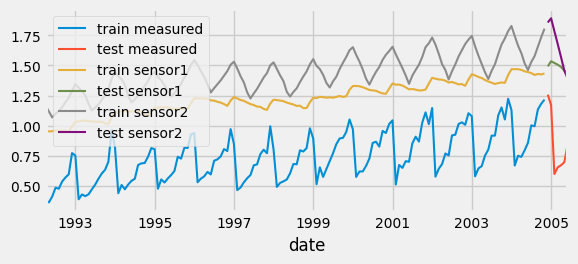

In [59]:
# Split historical data into train-test
# ==============================================================================
data_train = data[:-steps]
data_test = data[-steps:]
print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['y'].plot(ax=ax, label='train measured')
data_test['y'].plot(ax=ax, label='test measured')
data_train['exog_1'].plot(ax=ax, label='train sensor1')
data_test['exog_1'].plot(ax=ax, label='test sensor1')
data_train['exog_2'].plot(ax=ax, label='train sensor2')
data_test['exog_2'].plot(ax=ax, label='test sensor2')
ax.legend(loc='upper left');

In [61]:
# Validation
# ==============================================================================
import onnxruntime as ort
import numpy as np
import pandas as pd

# Load the old and new models
session_new_model = ort.InferenceSession("models/edge/1/model.onnx")
session_old_model = ort.InferenceSession("models/edge/1/old_model.onnx")

#TODO - Use the validation set to calculate error. 

NameError: name 'predictions_new_model' is not defined

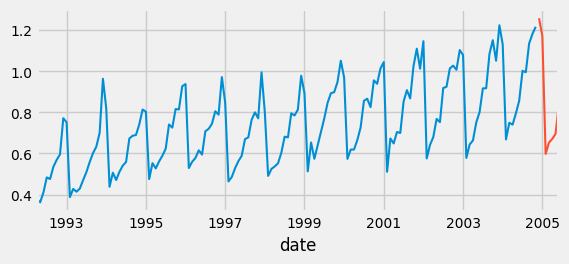

In [50]:
# Plot Validation
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predictions_new_model.plot(ax=ax, label='new model')
predictions_old_model.plot(ax=ax, label='old model')
ax.legend();

In [51]:
# Test error
# ==============================================================================
error_mse_new = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions_new_model
            )
print(f"New model test error (MSE): {error_mse_new}")

# Test error
# ==============================================================================
error_mse_old = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions_old_model
            )
print(f"New model test error (MSE): {error_mse_old}")

NameError: name 'predictions_new_model' is not defined